In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
# from keras.models import Sequential
# from keras.layers import LSTM,Dense,Dropout
# import tensorflow as tf
# from tensorflow import keras

In [2]:
# !pip install tensorflow

In [3]:
#reading the data and making the date is the index
data=pd.read_csv('Raw Data Storage/raw_nflx_all_data.csv',index_col='date',parse_dates=True)


In [4]:
data.head()

,open,high,low,close,volume
date,,,,,
2002-05-23,16.19,17.40,16.04,16.75,7485000
2002-05-24,17.00,17.15,16.76,16.94,793200
2002-05-28,16.99,17.25,16.20,16.20,472100
2002-05-29,16.30,16.30,15.20,15.45,482700
2002-05-30,15.51,15.51,15.00,15.00,725300


In [5]:
data.describe()

,open,high,low,close,volume
count,5841.000000,5841.000000,5841.000000,5841.000000,5.841000e+03
mean,236.032217,239.643163,232.434126,236.159900,5.097383e+06
std,240.402918,243.393636,237.428124,240.555283,5.870232e+06
min,5.290000,5.750000,4.850000,5.220000,2.040000e+04
25%,31.750000,32.480000,31.010000,31.820000,1.595772e+06
50%,155.300000,157.640000,152.410000,155.350000,3.398209e+06
75%,365.220000,370.900000,360.380000,365.210000,6.277480e+06
max,1338.230000,1341.150000,1321.210000,1339.130000,1.326446e+08


In [6]:
data.columns

Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5841 entries, 2002-05-23 to 2025-08-08
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    5841 non-null   float64
 1   high    5841 non-null   float64
 2   low     5841 non-null   float64
 3   close   5841 non-null   float64
 4   volume  5841 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 273.8 KB


In [8]:
data.head()

,open,high,low,close,volume
date,,,,,
2002-05-23,16.19,17.40,16.04,16.75,7485000
2002-05-24,17.00,17.15,16.76,16.94,793200
2002-05-28,16.99,17.25,16.20,16.20,472100
2002-05-29,16.30,16.30,15.20,15.45,482700
2002-05-30,15.51,15.51,15.00,15.00,725300


- There is no NaN data
- Date handled already
- next step is ploting our Data to see what is the important feature

# Ploting Data

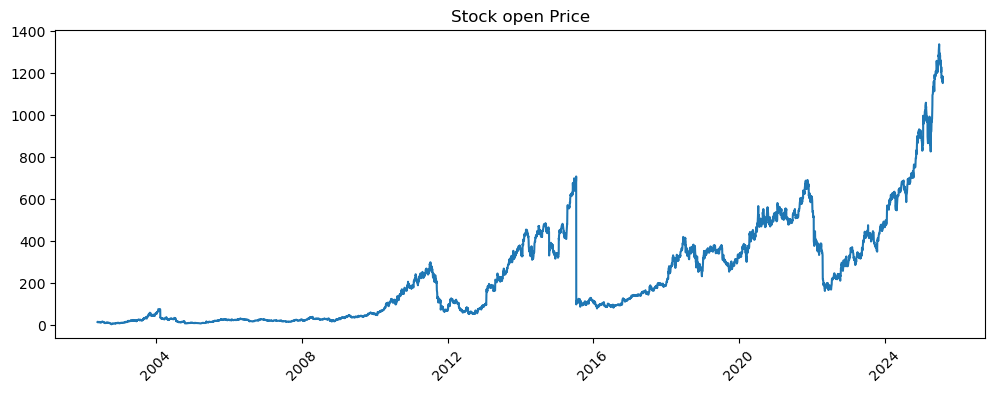

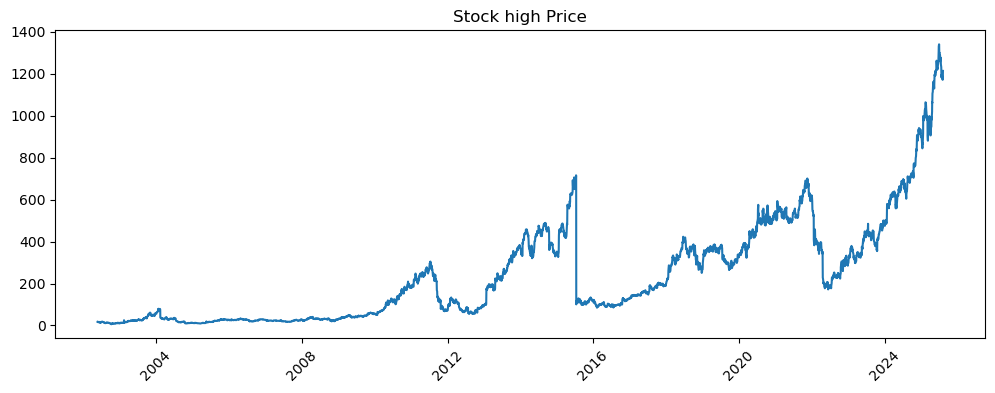

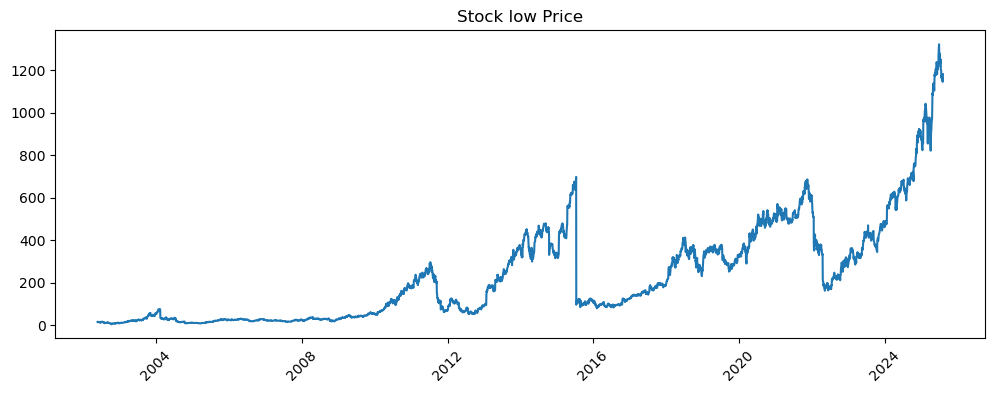

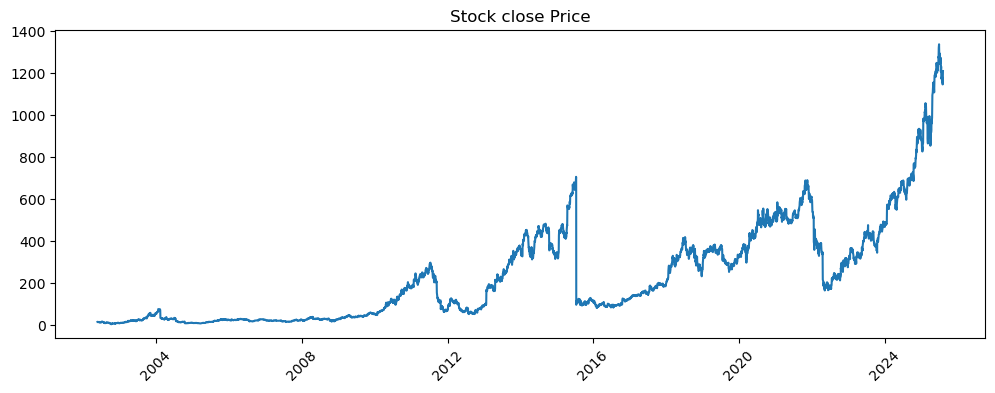

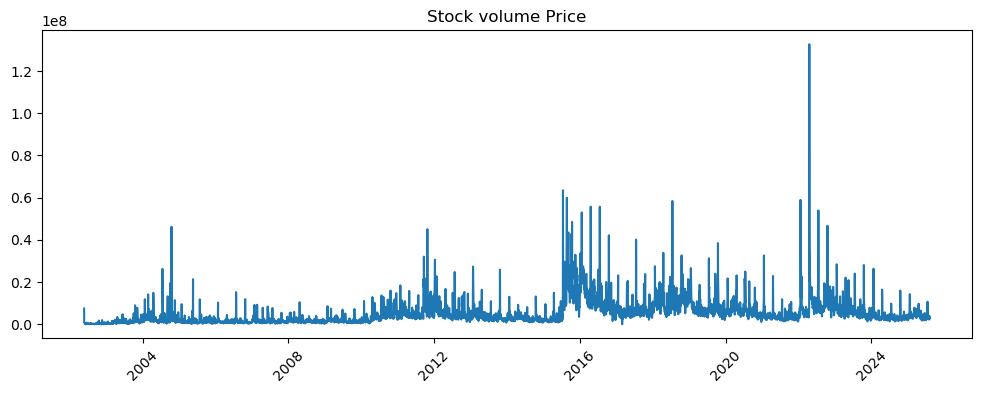

In [9]:
for columns in data.columns:
    plt.figure(figsize=(12,4))
    plt.title(f"Stock {columns} Price")
    plt.plot(data.index,data[columns])
    plt.xticks(rotation=45)

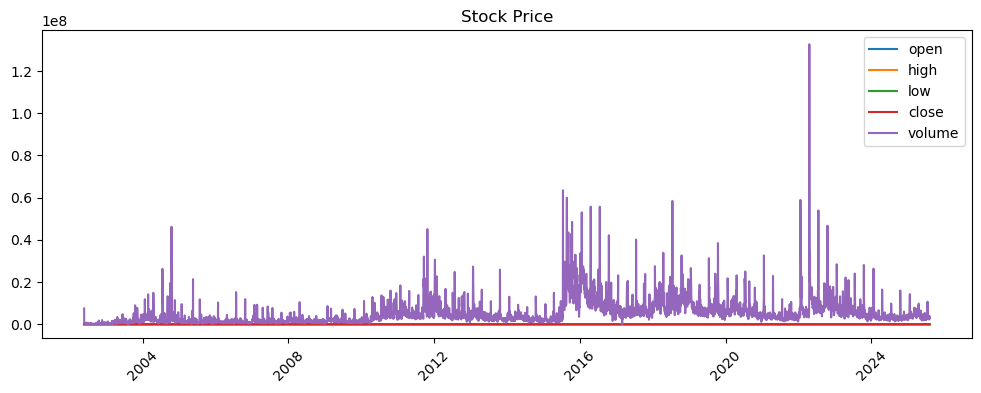

In [10]:
plt.figure(figsize=(12,4))
plt.title("Stock Price")
for columns in data.columns:
    if(columns !='Volume'):
        plt.plot(data.index,data[columns],label=columns)
plt.xticks(rotation=45)
plt.legend()

- after ploting Data we decide to take High feature to predict when the stock will be high
- next step we Data normalization

# Data Normalization

In [11]:
data=data['close']
data.shape

(5841,)

In [12]:
data

date
2002-05-23      16.75
2002-05-24      16.94
2002-05-28      16.20
2002-05-29      15.45
2002-05-30      15.00
               ...   
2025-08-04    1170.99
2025-08-05    1147.87
2025-08-06    1178.48
2025-08-07    1180.37
2025-08-08    1211.64
Name: close, Length: 5841, dtype: float64

In [13]:
scaler=MinMaxScaler(feature_range=(0,1))

In [14]:
# df=scaler.fit_transform(np.array(data['Close']).reshape(-1,1))
df=scaler.fit_transform(np.array(data).reshape([data.shape[0],1]))

In [15]:
# from sklearn.model_selection import train_test_split
# X_train,X_test=train_test_split(df,test_size=0.2,random_state=0)

In [16]:
# X_train.shape

In [17]:
# X_test.shape

# Convert array Values into a dataset values

In [18]:
def create_seq(data,time_step=60):
    X=[]
    y=[]
    for i in range(len(data)-time_step-1):
        X.append(data[i:(i+time_step)])
        y.append(data[i+time_step])
    return X,y

In [19]:
time_step=100
X,y=create_seq(df,time_step)

In [20]:
len(X),len(y)

(5740, 5740)

## reshape input to be [samples, time-steps, features] which is required for LSTM

In [21]:
X=np.array(X)
X=X.reshape(X.shape[0],X.shape[1],1)
y=np.array(y)

In [22]:
X.shape,y.shape

((5740, 100, 1), (5740, 1))

## Splitting the data

In [23]:
X_train,X_test,y_train,y_test=X[:int(data.shape[0]*0.8)],X[int(data.shape[0]*0.8):],y[:int(data.shape[0]*0.8)],y[int(data.shape[0]*0.8):]

In [24]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4672, 100, 1), (1068, 100, 1), (4672, 1), (1068, 1))

# Model

In [25]:
!pip uninstall tensorflow keras -y



Found existing installation: tensorflow 2.20.0rc0
Uninstalling tensorflow-2.20.0rc0:
  Successfully uninstalled tensorflow-2.20.0rc0
Found existing installation: keras 3.11.1
Uninstalling keras-3.11.1:
  Successfully uninstalled keras-3.11.1


In [26]:
!pip install tensorflow

  Using cached tensorflow-2.20.0rc0-cp313-cp313-macosx_12_0_arm64.whl.metadata (4.5 kB)
  Using cached keras-3.11.1-py3-none-any.whl.metadata (5.9 kB)
Using cached tensorflow-2.20.0rc0-cp313-cp313-macosx_12_0_arm64.whl (200.7 MB)
Using cached keras-3.11.1-py3-none-any.whl (1.4 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [tensorflow]2 [tensorflow]


In [ ]:
import tensorflow as tf
print(tf.__version__)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [28]:
model=Sequential()
model.add(LSTM(128,return_sequences=True,input_shape=X_train[0].shape))
model.add(LSTM(64,return_sequences=True))
model.add(LSTM(32))
model.add(Dense(16,activation='relu'))
model.add(Dense(1))
model.compile(optimizer= keras.optimizers.Adam(learning_rate=0.001),loss="mean_squared_error",metrics=[keras.metrics.RootMeanSquaredError()])
model.summary()

NameError: name 'Sequential' is not defined

## Training the Model

In [25]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
26/26 [==============================] - 10s 158ms/step - loss: 0.0429 - root_mean_squared_error: 0.2072
Epoch 2/100
26/26 [==============================] - 4s 159ms/step - loss: 0.0051 - root_mean_squared_error: 0.0713
Epoch 3/100
26/26 [==============================] - 4s 164ms/step - loss: 0.0031 - root_mean_squared_error: 0.0559
Epoch 4/100
26/26 [==============================] - 4s 164ms/step - loss: 0.0029 - root_mean_squared_error: 0.0536
Epoch 5/100
26/26 [==============================] - 4s 159ms/step - loss: 0.0029 - root_mean_squared_error: 0.0539
Epoch 6/100
26/26 [==============================] - 4s 162ms/step - loss: 0.0028 - root_mean_squared_error: 0.0526
Epoch 7/100
26/26 [==============================] - 4s 163ms/step - loss: 0.0027 - root_mean_squared_error: 0.0518
Epoch 8/100
26/26 [==============================] - 4s 158ms/step - loss: 0.0028 - root_mean_squared_error: 0.0525
Epoch 9/100
26/26 [==============================] - 4s 159ms/step - lo

## Test the Model

In [26]:
trainPred=model.predict(X_train)
testPred=model.predict(X_test)
trainPred=scaler.inverse_transform(trainPred)
testPred=scaler.inverse_transform(testPred)

4/4 [==============================] - 0s 47ms/step


## Model performance

In [27]:
model.evaluate(X_test,y_test)

4/4 [==============================] - 2s 49ms/step - loss: 0.0024 - root_mean_squared_error: 0.0490


[0.0023979267571121454, 0.04896863177418709]

## Ploting Performance

In [28]:
look_back=time_step
# shift train predictions for plotting (time step)

trainPredPlot=np.empty_like(scaler.inverse_transform(df))
trainPredPlot[:]=np.nan
trainPredPlot[look_back:len(trainPred)+look_back]=trainPred

#shift test predictions for plotting(time_step)
testPredPlot=np.empty_like(scaler.inverse_transform(df))
testPredPlot[:]=np.nan
testPredPlot[len(trainPred)+look_back:len(trainPred)+look_back+len(testPred)]=testPred


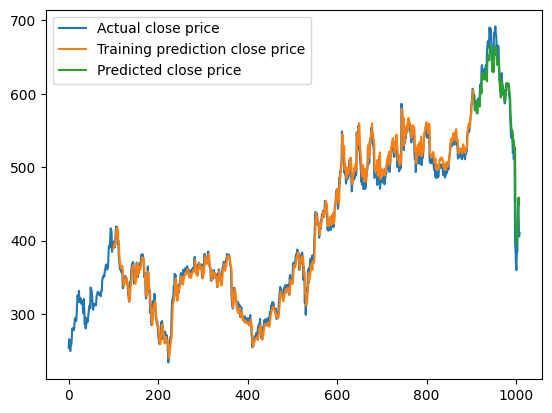

In [29]:
plt.plot(scaler.inverse_transform(df),label="Actual close price")
plt.plot(trainPredPlot,label="Training prediction close price")
plt.plot(testPredPlot,label="Predicted close price")
plt.legend()
plt.show()

# Next 30 days prediction

In [30]:
predection_data=np.array(data[-time_step:])
predection_data=predection_data.reshape([predection_data.shape[0],1])

In [31]:
def predication(data,days=30):
    data=scaler.transform(data)
    pred=[]
    for i in range(1,days+1):
        nxt_day=model.predict([data],verbose=0)
        pred.append(scaler.inverse_transform(nxt_day)[0])
        data[:-1]=data[1:]
        data[-1]=nxt_day[0]
    return np.array(pred).squeeze()

In [32]:
days=30
res=predication(predection_data,days)

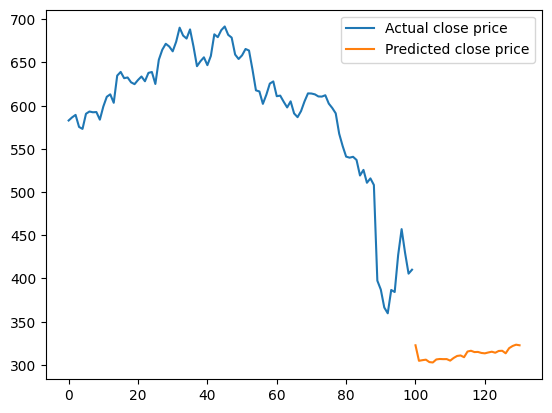

In [33]:
trainPredPlot=np.zeros(shape=[len(predection_data)+1+days])
trainPredPlot[:]=np.nan
trainPredPlot[len(predection_data)]=res[-1]
trainPredPlot[len(predection_data)+1:]=res
df_=predection_data
plt.plot(df_,label="Actual close price")
plt.plot(trainPredPlot,label="Predicted close price")
plt.legend()
plt.show()